<a href="https://colab.research.google.com/github/aleanco/labo2024ba/blob/main/Clase_1_ejercicio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 1</h3>
    <h5>Ejercicio 4</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistente: Sebastián Calcagno <p>
 <p>
</div>

Simularemos un dataset donde tendremos 200 observaciones mensuales, con las siguientes columnas:

Fecha: indice temporal desde enero de 2005.

Serie_total: combinacion de tendencia, estacionalidad y ruido.

Ruido_blanco: muestra de ruido gaussiano.

AR1: proceso autorregresivo de primer orden.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
n = 200
fechas = pd.date_range(start='2005-01-01', periods=n, freq='M')

tendencia = np.linspace(10, 50, n)
estacionalidad = 5 * np.sin(2 * np.pi * np.arange(n) / 12)
ruido = np.random.normal(0, 2, n)
serie_total = tendencia + estacionalidad + ruido

ar1 = [0]
phi = 0.7
for t in range(1, n):
    ar1.append(phi * ar1[t-1] + np.random.normal(0, 1))
ar1 = np.array(ar1)

df = pd.DataFrame({
    'Fecha': fechas,
    'Serie_total': serie_total,
    'Ruido_blanco': ruido,
    'AR1': ar1
})

df.set_index('Fecha', inplace=True)

df.head()

<ipython-input-1-2f16e4deb3d5>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start='2005-01-01', periods=n, freq='M')


,Serie_total,Ruido_blanco,AR1
Fecha,,,
2005-01-31,10.993428,0.993428,0.000000
2005-02-28,12.424476,-0.276529,0.357787
2005-03-31,16.027514,1.295377,0.811236
2005-04-30,18.649075,3.046060,1.650916
2005-05-31,14.665840,-0.468307,2.209443


Pedimos practicar :

- Graficar cada columna e interpretar su comportamiento.

- Calcular y graficar ACF y PACF de las series originales.

- Aplicar .diff() para observar el efecto de la diferenciación.

- Aplicar la descomposicion de las columna "serie total".


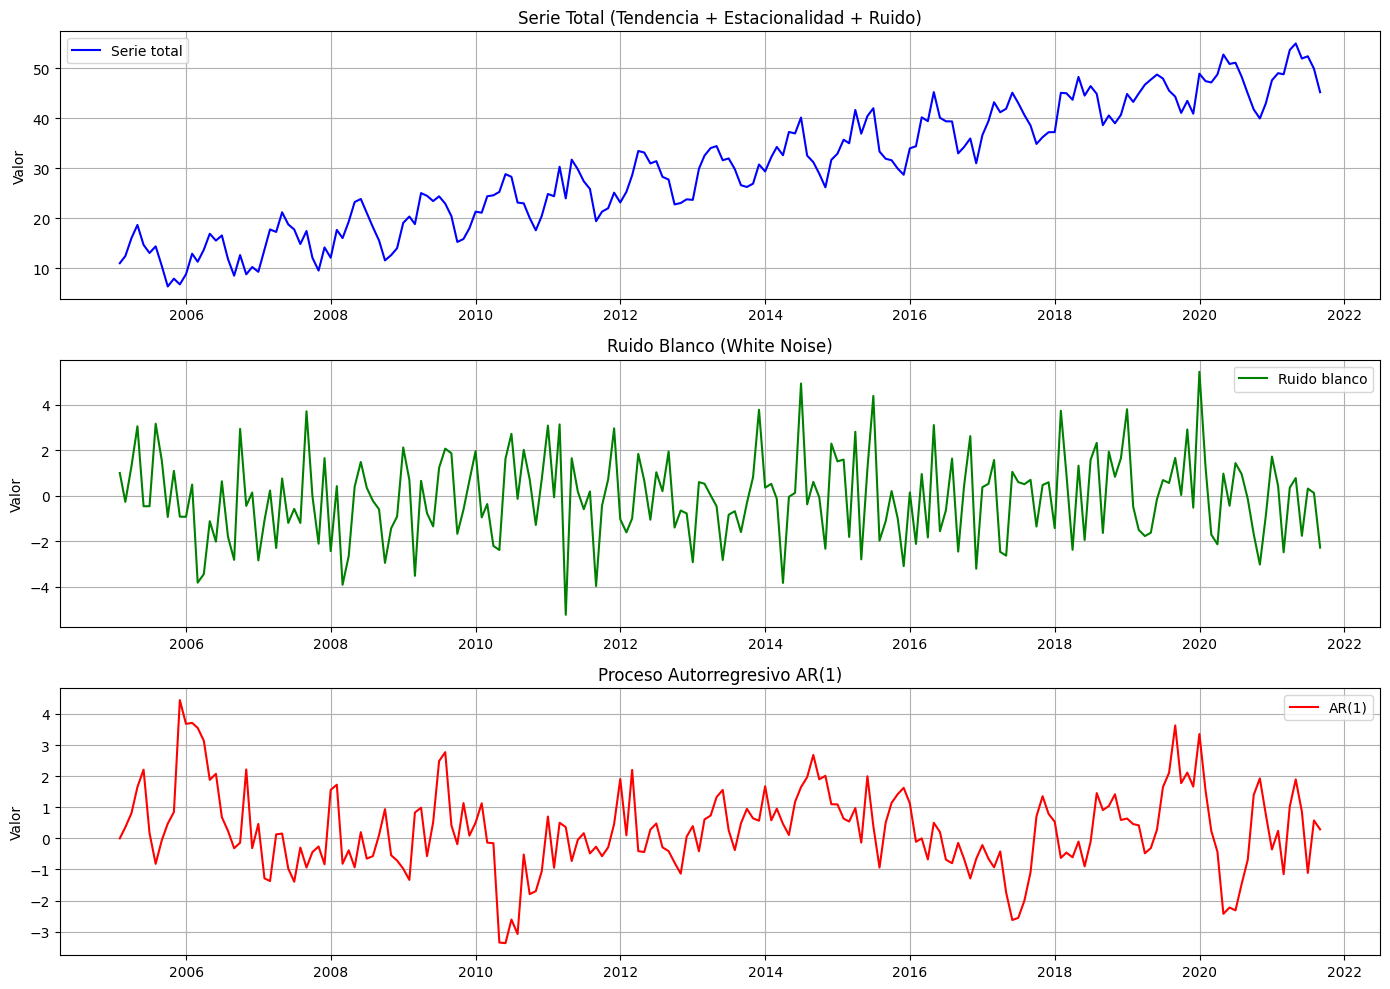

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
## Graficar cada columna e interpretar su comportamiento.
# Serie Total
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Serie_total'], label='Serie total', color='blue')
plt.title('Serie Total (Tendencia + Estacionalidad + Ruido)')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()

# Ruido Blanco
plt.subplot(3, 1, 2)
plt.plot(df.index, df['Ruido_blanco'], label='Ruido blanco', color='green')
plt.title('Ruido Blanco (White Noise)')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()

# AR(1)
plt.subplot(3, 1, 3)
plt.plot(df.index, df['AR1'], label='AR(1)', color='red')
plt.title('Proceso Autorregresivo AR(1)')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()




Calcular y graficar ACF y PACF de las series originales.


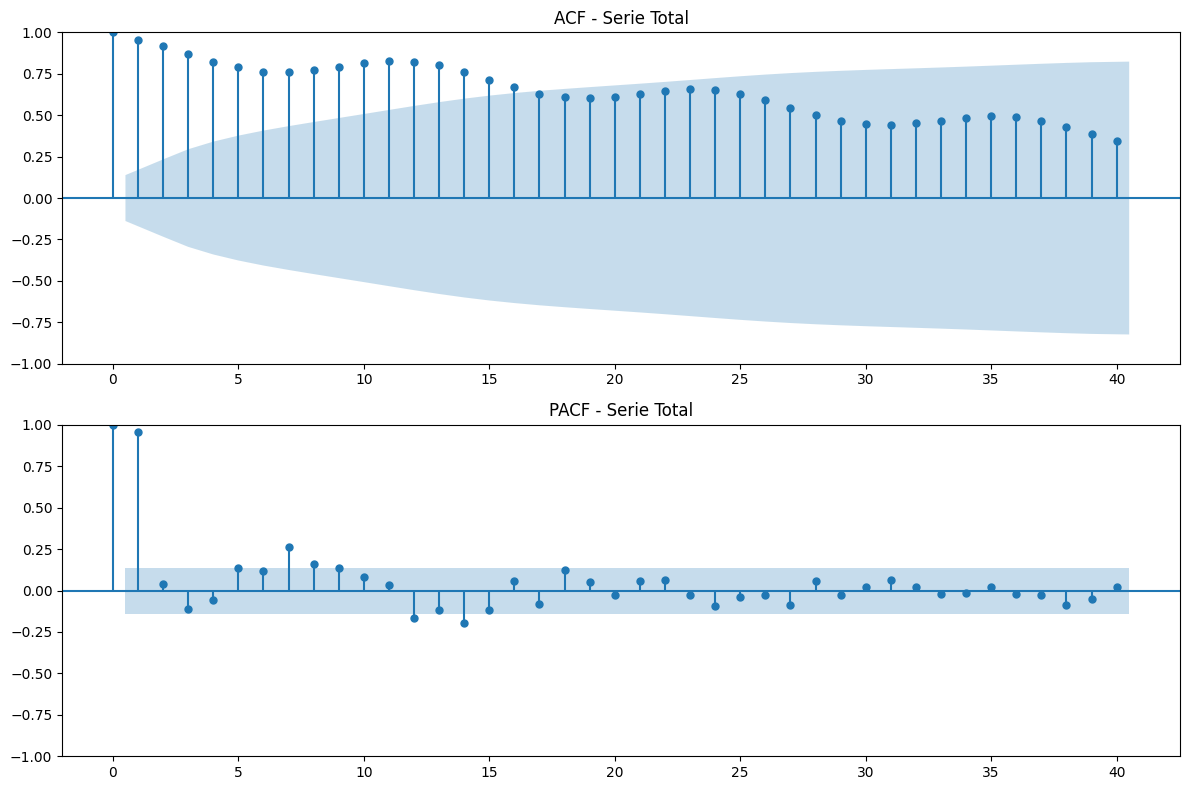

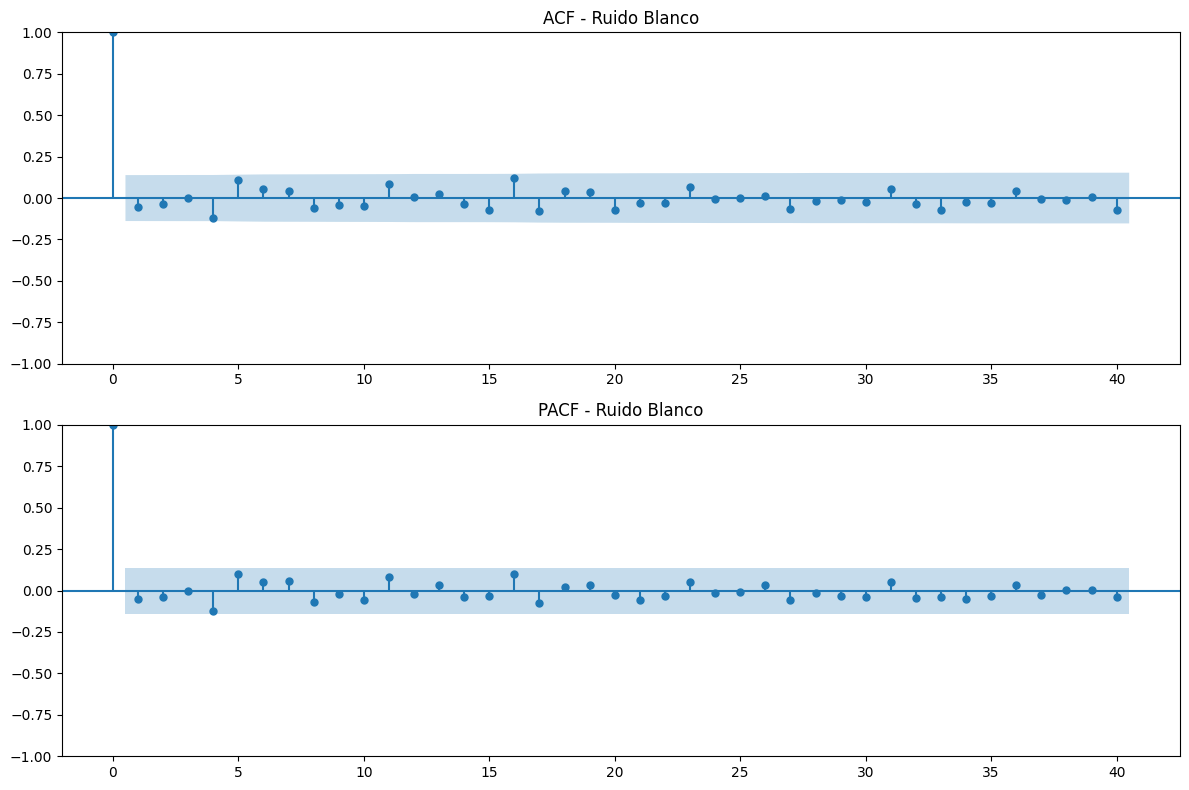

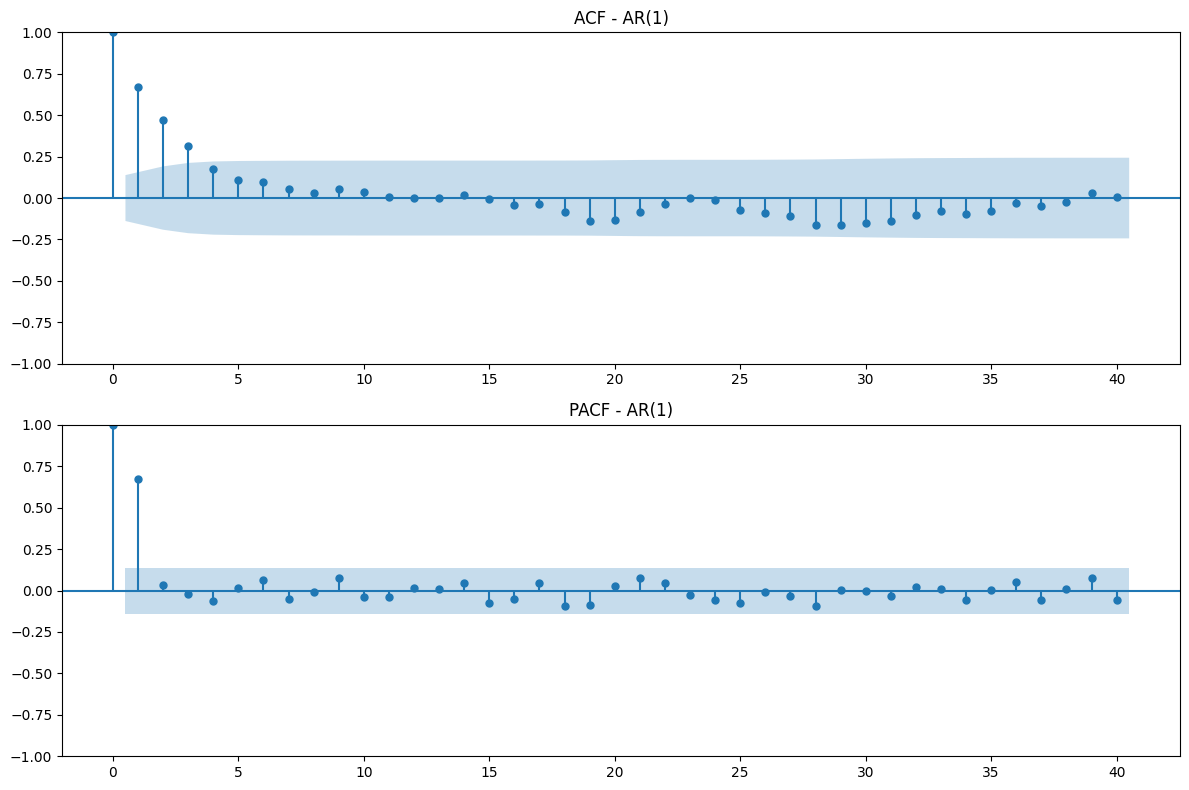

In [3]:
# prompt: Calcular y graficar ACF y PACF de las series originales.

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calcular y graficar ACF y PACF para Serie_total
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plot_acf(df['Serie_total'], ax=plt.gca(), lags=40)
plt.title('ACF - Serie Total')

plt.subplot(2, 1, 2)
plot_pacf(df['Serie_total'], ax=plt.gca(), lags=40)
plt.title('PACF - Serie Total')
plt.tight_layout()
plt.show()

# Calcular y graficar ACF y PACF para Ruido_blanco
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plot_acf(df['Ruido_blanco'], ax=plt.gca(), lags=40)
plt.title('ACF - Ruido Blanco')

plt.subplot(2, 1, 2)
plot_pacf(df['Ruido_blanco'], ax=plt.gca(), lags=40)
plt.title('PACF - Ruido Blanco')
plt.tight_layout()
plt.show()

# Calcular y graficar ACF y PACF para AR1
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plot_acf(df['AR1'], ax=plt.gca(), lags=40)
plt.title('ACF - AR(1)')

plt.subplot(2, 1, 2)
plot_pacf(df['AR1'], ax=plt.gca(), lags=40)
plt.title('PACF - AR(1)')
plt.tight_layout()
plt.show()




Aplicar .diff() para observar el efecto de la diferenciación.

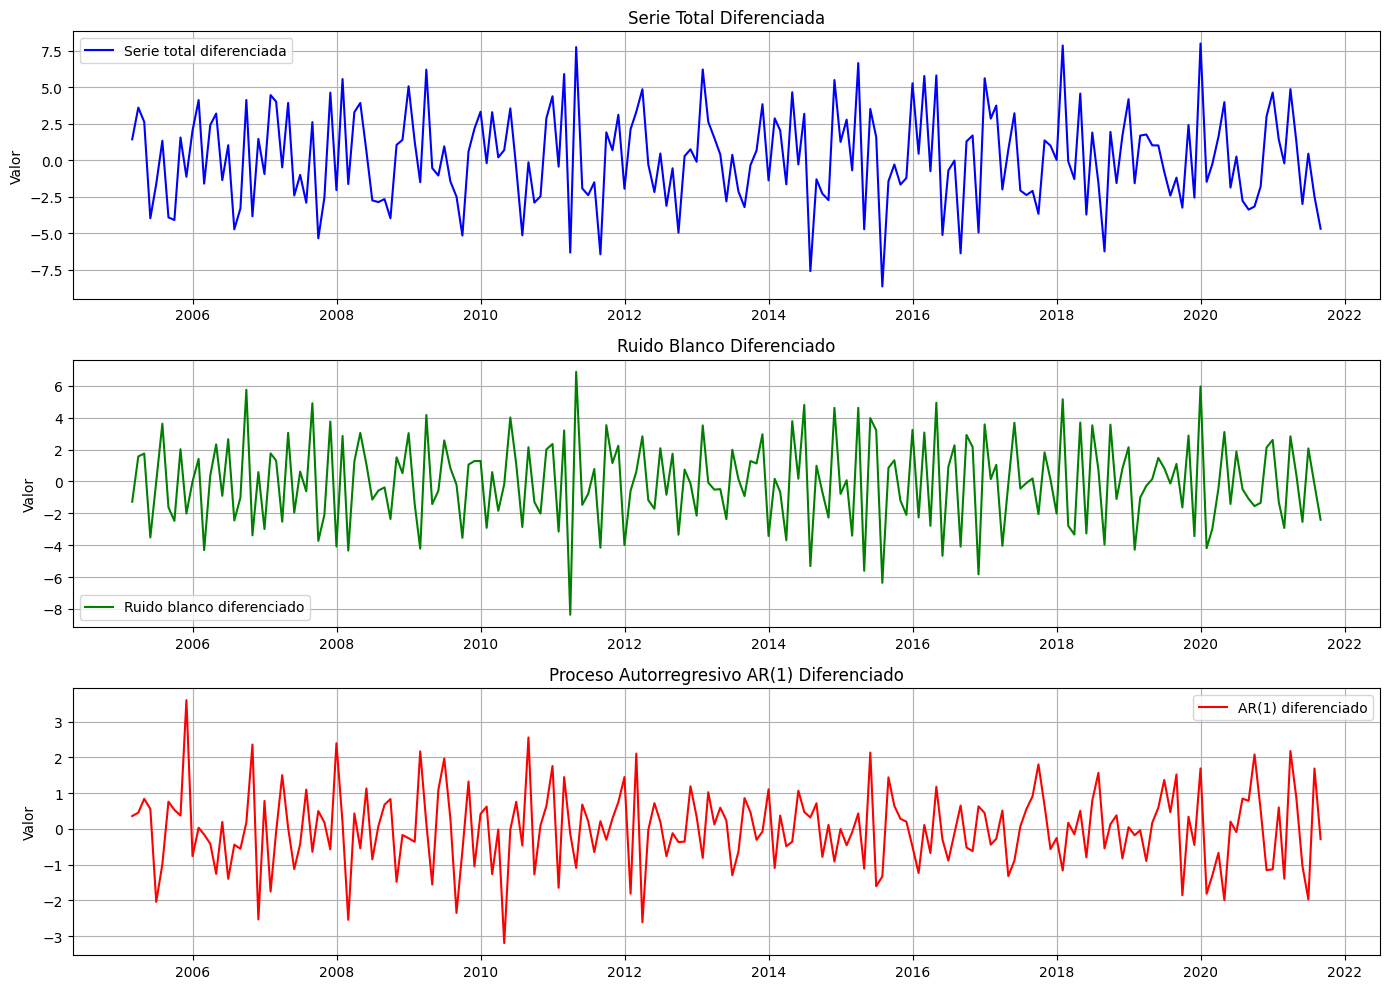

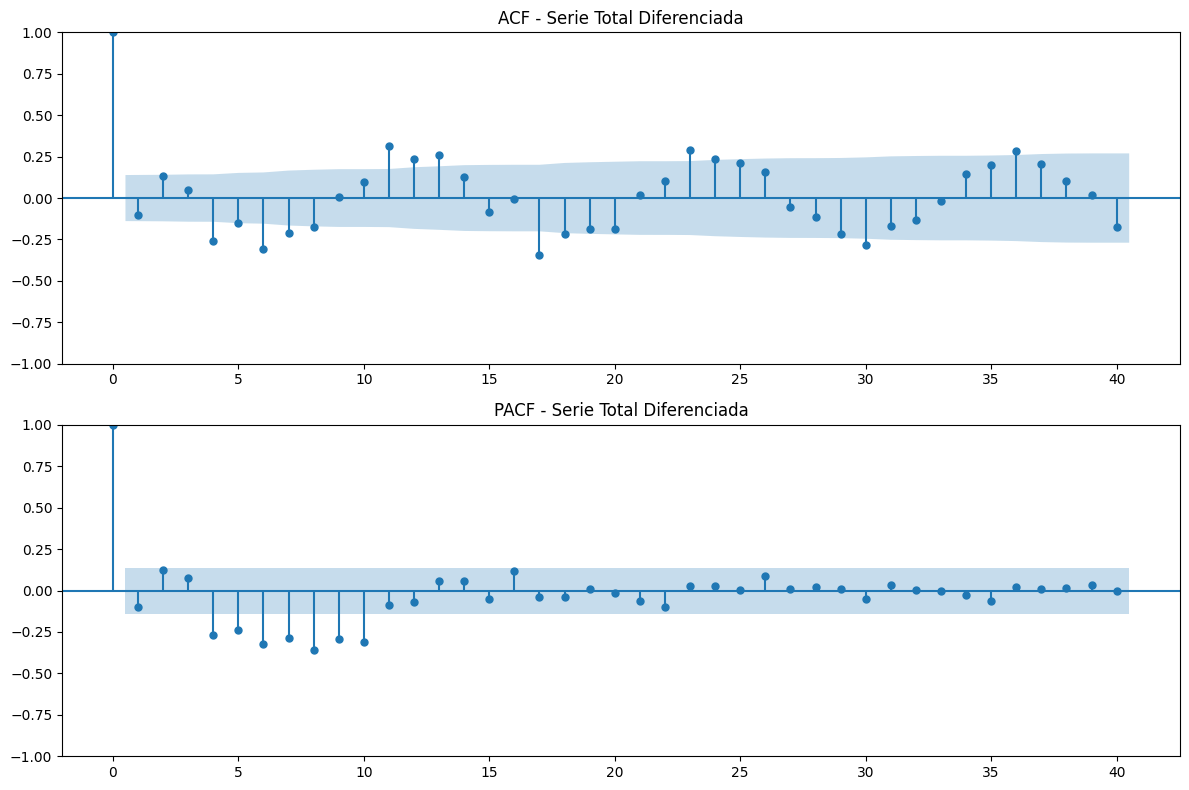

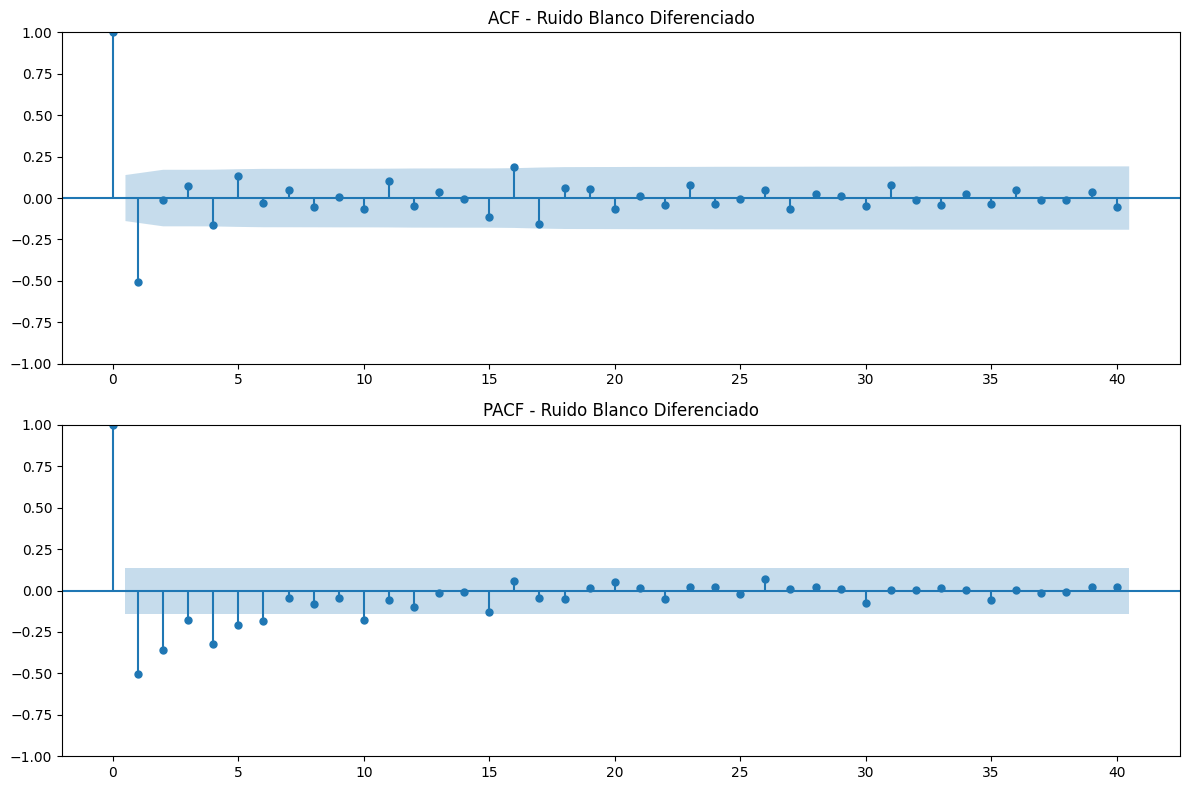

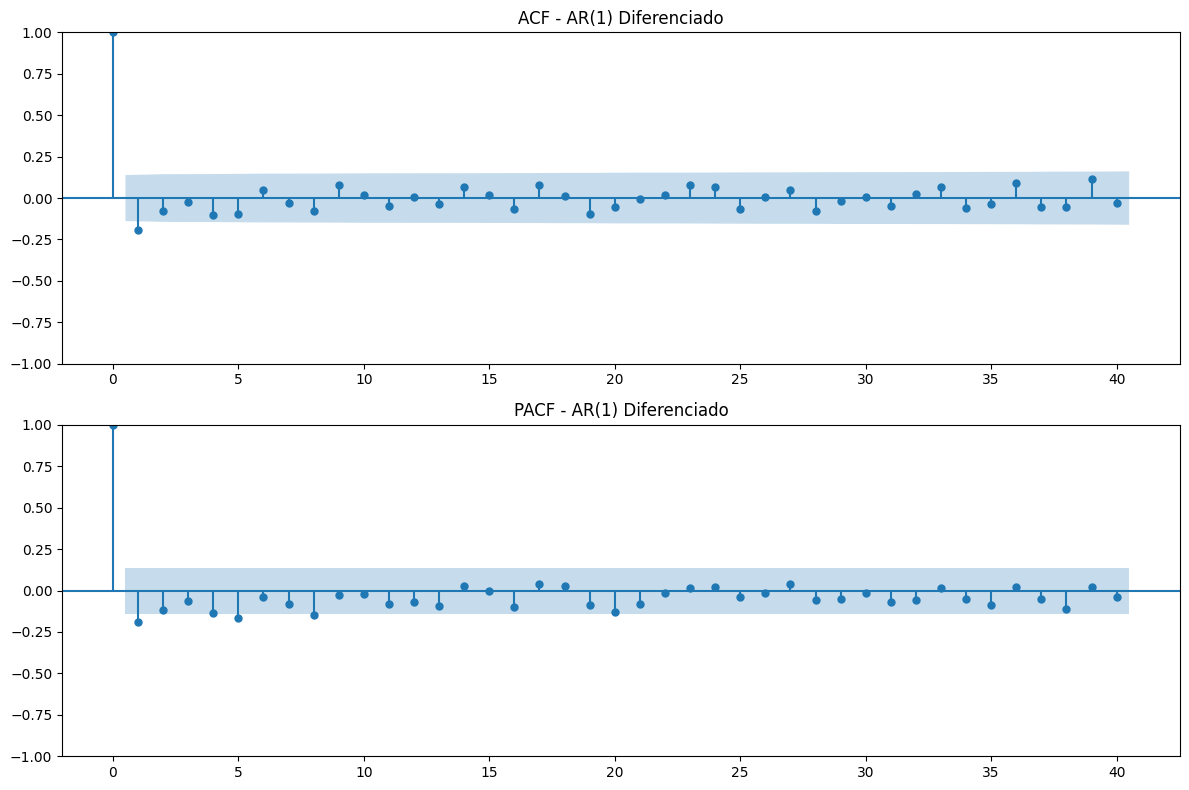

In [4]:
# prompt: Aplicar .diff() para observar el efecto de la diferenciación.

import matplotlib.pyplot as plt
# Aplicar diferenciación a cada columna
df_diff = df.diff().dropna()

# Graficar las series diferenciadas
plt.figure(figsize=(14, 10))

# Serie Total Diferenciada
plt.subplot(3, 1, 1)
plt.plot(df_diff.index, df_diff['Serie_total'], label='Serie total diferenciada', color='blue')
plt.title('Serie Total Diferenciada')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()

# Ruido Blanco Diferenciado (debería ser similar al original)
plt.subplot(3, 1, 2)
plt.plot(df_diff.index, df_diff['Ruido_blanco'], label='Ruido blanco diferenciado', color='green')
plt.title('Ruido Blanco Diferenciado')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()

# AR(1) Diferenciado
plt.subplot(3, 1, 3)
plt.plot(df_diff.index, df_diff['AR1'], label='AR(1) diferenciado', color='red')
plt.title('Proceso Autorregresivo AR(1) Diferenciado')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Calcular y graficar ACF y PACF de las series diferenciadas
# Calcular y graficar ACF y PACF para Serie_total diferenciada
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plot_acf(df_diff['Serie_total'], ax=plt.gca(), lags=40)
plt.title('ACF - Serie Total Diferenciada')

plt.subplot(2, 1, 2)
plot_pacf(df_diff['Serie_total'], ax=plt.gca(), lags=40)
plt.title('PACF - Serie Total Diferenciada')
plt.tight_layout()
plt.show()

# Calcular y graficar ACF y PACF para Ruido_blanco diferenciado
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plot_acf(df_diff['Ruido_blanco'], ax=plt.gca(), lags=40)
plt.title('ACF - Ruido Blanco Diferenciado')

plt.subplot(2, 1, 2)
plot_pacf(df_diff['Ruido_blanco'], ax=plt.gca(), lags=40)
plt.title('PACF - Ruido Blanco Diferenciado')
plt.tight_layout()
plt.show()

# Calcular y graficar ACF y PACF para AR1 diferenciado
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plot_acf(df_diff['AR1'], ax=plt.gca(), lags=40)
plt.title('ACF - AR(1) Diferenciado')

plt.subplot(2, 1, 2)
plot_pacf(df_diff['AR1'], ax=plt.gca(), lags=40)
plt.title('PACF - AR(1) Diferenciado')
plt.tight_layout()
plt.show()




Aplicar la descomposicion de las columna "serie total".

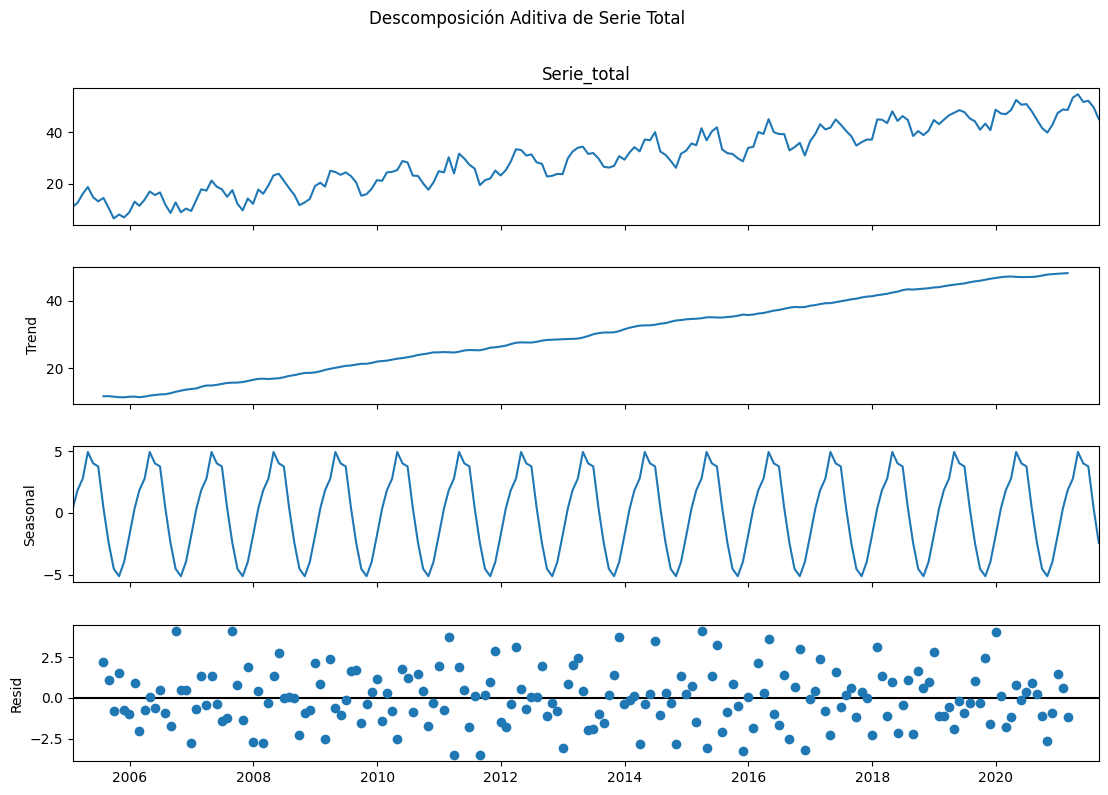

In [13]:
# prompt: Aplicar la descomposicion de las columna "serie total".

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicar la descomposición aditiva a la serie total
decomposition = seasonal_decompose(df['Serie_total'], model='additive', period=12) # Suponemos estacionalidad mensual (period=12)

# Graficar la descomposición
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Descomposición Aditiva de Serie Total', y=1.02) # Añadir un título general
plt.show()

# También puedes acceder a los componentes individuales:
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# Puedes graficar los componentes por separado si lo deseas:
# plt.figure(figsize=(12, 8))
# plt.subplot(4, 1, 1)
# plt.plot(df.index, df['Serie_total'], label='Original')
# plt.legend()
# plt.subplot(4, 1, 2)
# plt.plot(df.index, trend, label='Tendencia')
# plt.legend()
# plt.subplot(4, 1, 3)
# plt.plot(df.index, seasonal, label='Estacionalidad')
# plt.legend()
# plt.subplot(4, 1, 4)
# plt.plot(df.index, residual, label='Residuo')
# plt.legend()
# plt.tight_layout()
# plt.show()



In [8]:
# prompt: SARIMA(p=2, d=1, q=0)(P=1, D=0, Q=0, s=12)

import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar un modelo SARIMA a la Serie_total
# (p=2, d=1, q=0) -> Orden no estacional
# (P=1, D=0, Q=0, s=12) -> Orden estacional (s=12 para datos mensuales)

# Definimos los órdenes
order = (2, 1, 0)
seasonal_order = (1, 0, 0, 12)

# Creamos el modelo SARIMAX
model = SARIMAX(df['Serie_total'], order=order, seasonal_order=seasonal_order)

# Ajustamos el modelo
results = model.fit(disp=False) # disp=False para no imprimir información de optimización durante el ajuste

# Imprimimos el resumen del modelo
print(results.summary())

# Opcional: realizar predicciones
# forecast_steps = 24 # Número de pasos para pronosticar
# forecast = results.get_forecast(steps=forecast_steps)
# forecast_ci = forecast.conf_int() # Intervalos de confianza

# print("\nForecast:")
# print(forecast.predicted_mean)
# print("\nForecast Confidence Intervals:")
# print(forecast_ci)

# Opcional: graficar el ajuste y pronóstico
# plt.figure(figsize=(12, 6))
# plt.plot(df.index, df['Serie_total'], label='Observado')
# plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Pronóstico')
# plt.fill_between(forecast_ci.index,
#                 forecast_ci.iloc[:, 0],
#                 forecast_ci.iloc[:, 1], color='k', alpha=.2, label='Intervalo de Confianza')
# plt.title('Ajuste y Pronóstico SARIMA')
# plt.xlabel('Fecha')
# plt.ylabel('Valor')
# plt.legend()
# plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        Serie_total   No. Observations:                  200
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -490.947
Date:                            Sat, 31 May 2025   AIC                            989.893
Time:                                    01:04:53   BIC                           1003.066
Sample:                                01-31-2005   HQIC                           995.225
                                     - 08-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6312      0.078     -8.132      0.000      -0.783      -0.479
ar.L2         -0.2655      0.076   